In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

Thresholding

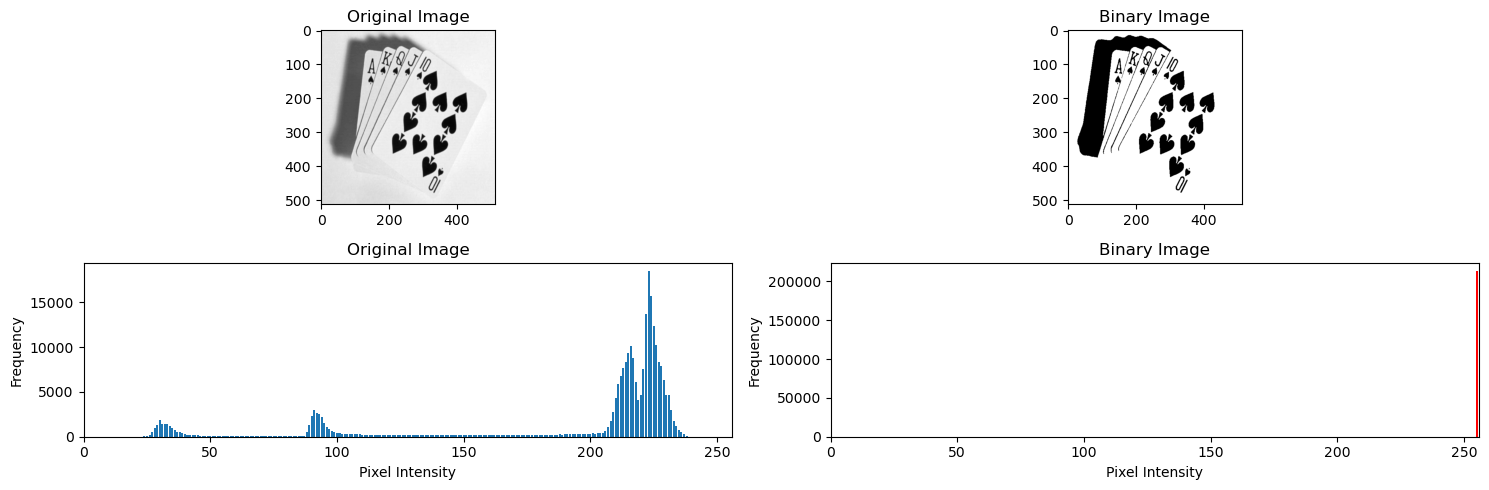

In [3]:
image=cv2.imread("Images/card.png", cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(512,512))
_,binary_image=cv2.threshold(image,150,255,cv2.THRESH_BINARY)
plt.figure(figsize=(15,5))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Binary Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(2,2,3)
plt.title("Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.bar(range(256), cv2.calcHist([image], [0], None, [256], [0, 256]).ravel())

plt.subplot(2, 2, 4)
plt.title("Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.bar(range(256), cv2.calcHist([binary_image], [0], None, [256], [0, 256]).ravel(),color='red')

plt.tight_layout()
plt.show()

Line Detection

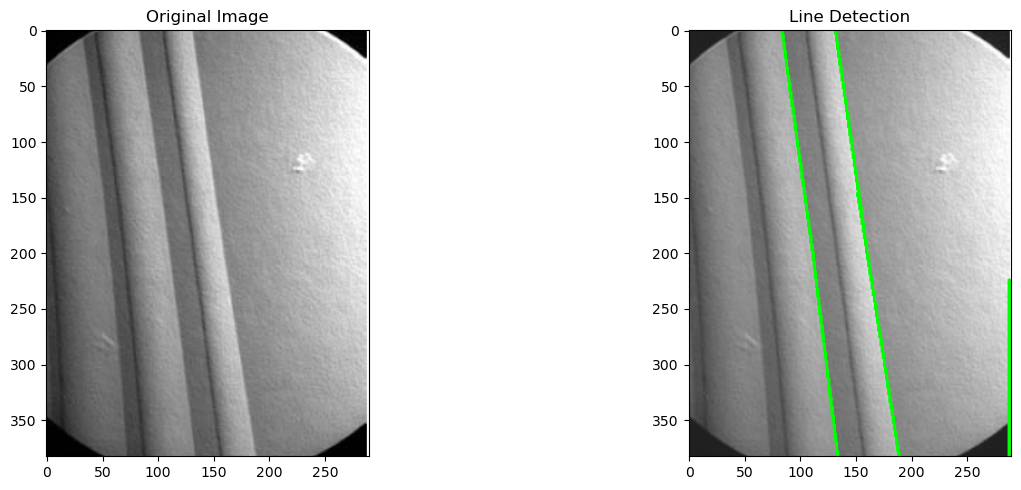

In [5]:
image = cv2.imread('Images/line.jpeg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

edges = cv2.Canny(blurred_image, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green lines

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Line Detection")
plt.imshow(line_image)

plt.tight_layout()
plt.show()

Edge detection using customs kernel

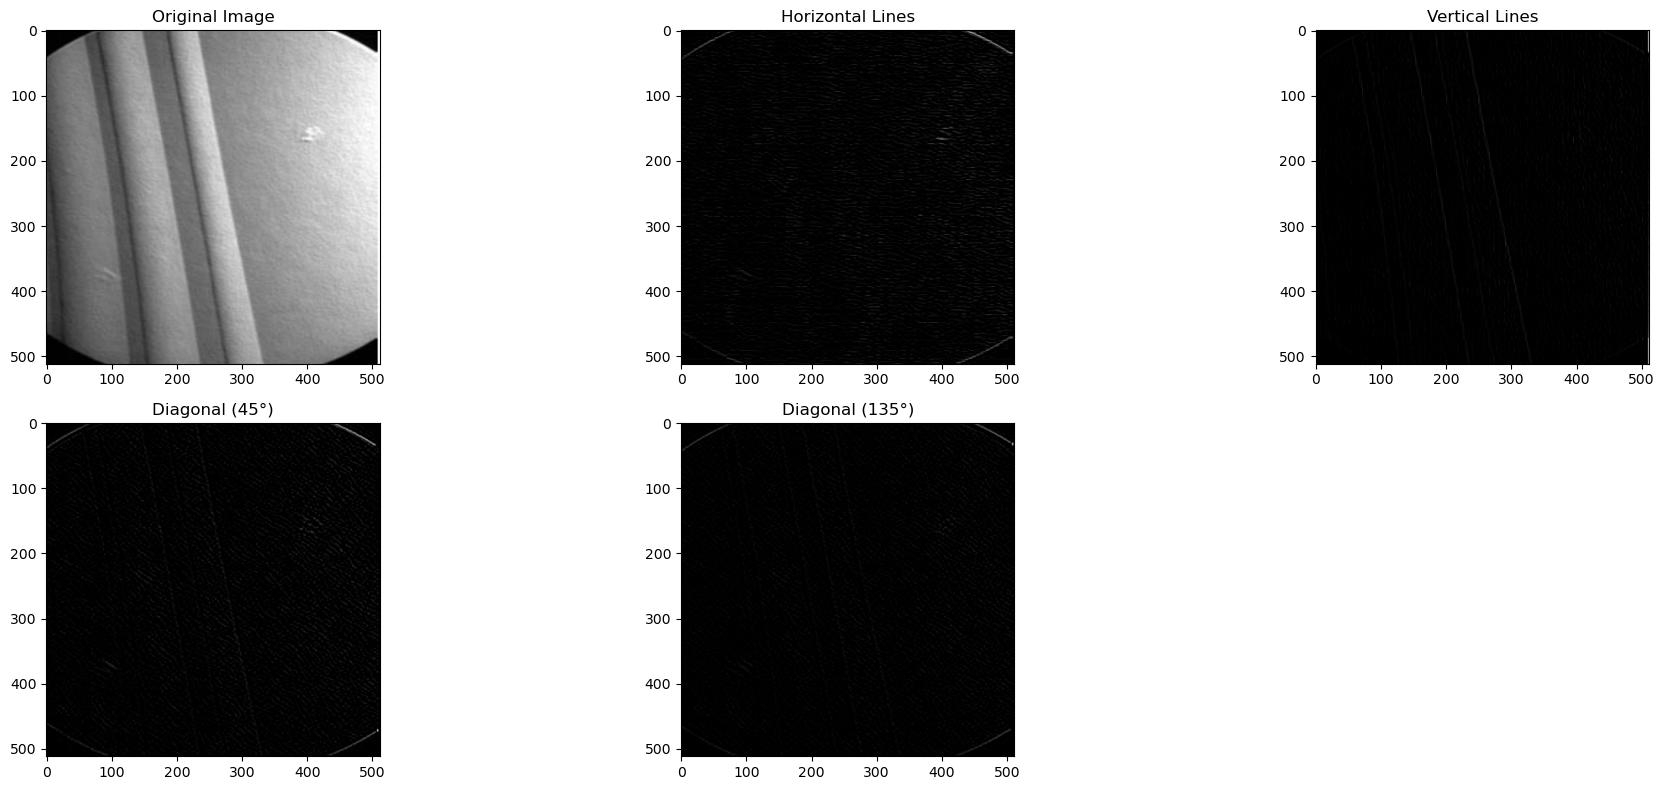

In [9]:
image = cv2.imread("Images/line.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))  # Resize to 512x512

# Define Custom Kernels
horizontal_kernel = np.array([[-1, -1, -1], 
                              [ 2,  2,  2], 
                              [-1, -1, -1]])

vertical_kernel = np.array([[-1,  2, -1], 
                            [-1,  2, -1], 
                            [-1,  2, -1]])

diagonal_kernel_45 = np.array([[ 2, -1, -1], 
                               [-1,  2, -1], 
                               [-1, -1,  2]])

diagonal_kernel_135 = np.array([[-1, -1,  2], 
                                [-1,  2, -1], 
                                [ 2, -1, -1]])

# Apply Convolution (Filter)
horizontal_edges = cv2.filter2D(image, -1, horizontal_kernel)
vertical_edges = cv2.filter2D(image, -1, vertical_kernel)
diagonal_45_edges = cv2.filter2D(image, -1, diagonal_kernel_45)
diagonal_135_edges = cv2.filter2D(image, -1, diagonal_kernel_135)

# Plot the results
plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(horizontal_edges, cmap='gray'), plt.title("Horizontal Lines")
plt.subplot(2, 3, 3), plt.imshow(vertical_edges, cmap='gray'), plt.title("Vertical Lines")
plt.subplot(2, 3, 4), plt.imshow(diagonal_45_edges, cmap='gray'), plt.title("Diagonal (45°)")
plt.subplot(2, 3, 5), plt.imshow(diagonal_135_edges, cmap='gray'), plt.title("Diagonal (135°)")

plt.tight_layout()
plt.show()


Laplacian kernel

(<Axes: title={'center': 'Line Detectoion'}>,
 Text(0.5, 1.0, 'Line Detectoion'))

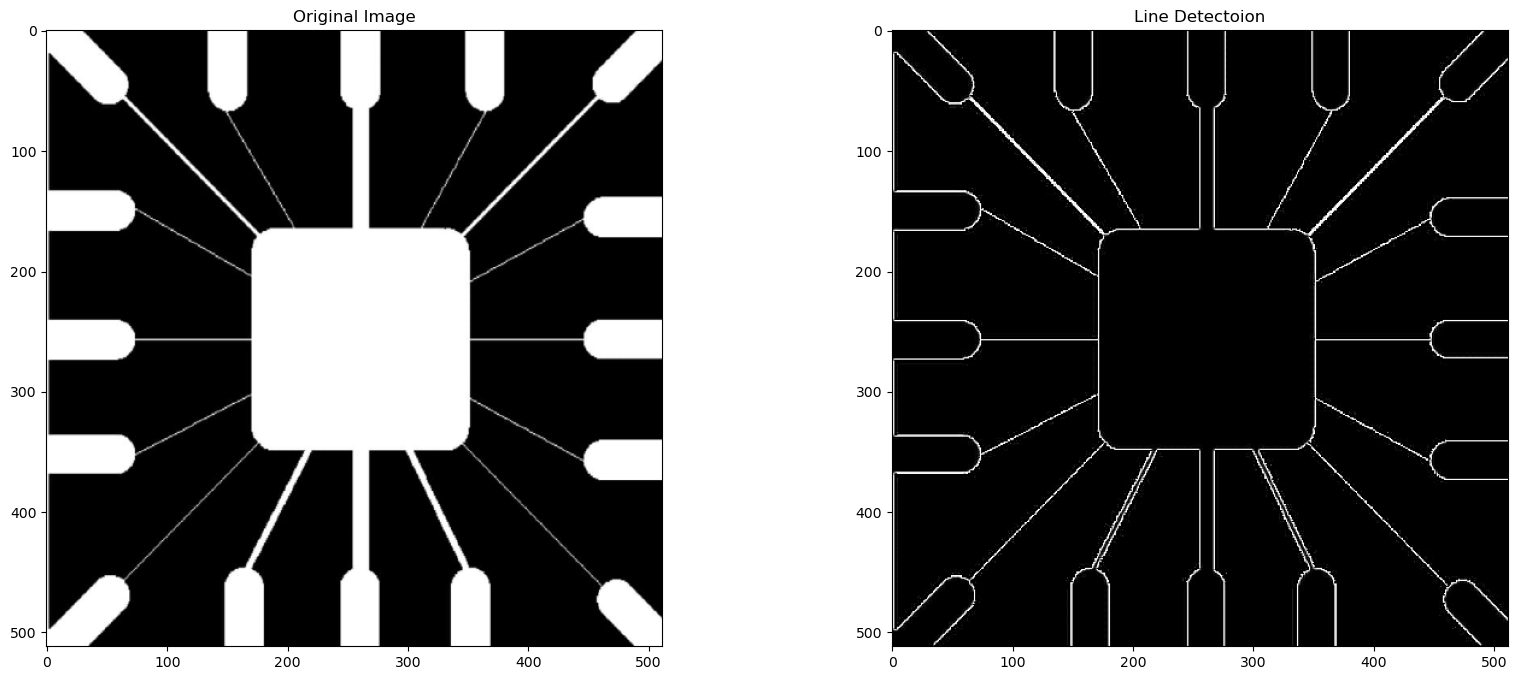

In [11]:
image=cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(512,512))
kernel=np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]
                 ])
line_image=cv2.filter2D(image,-1,kernel)
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(line_image, cmap='gray'), plt.title("Line Detectoion")

Point detection using laplacian filter

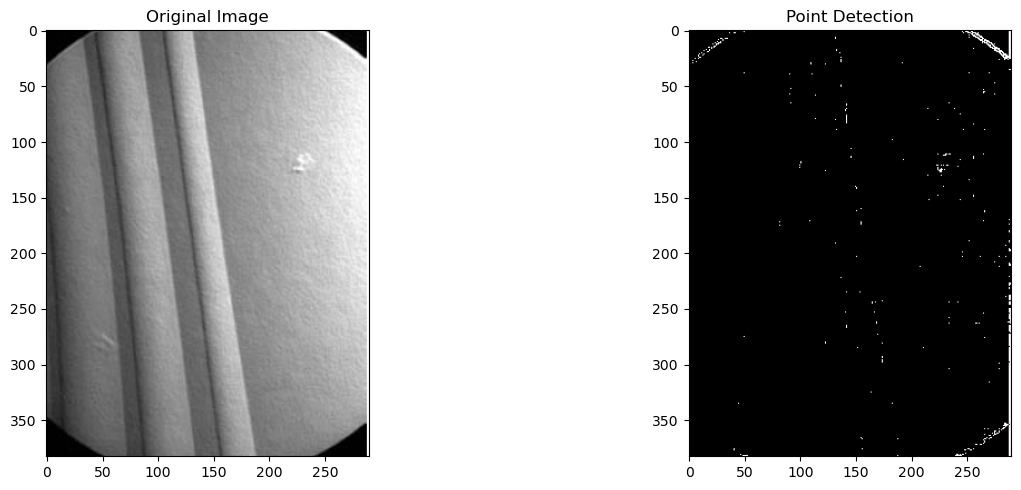

In [6]:
image = cv2.imread('Images/line.jpeg', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

_, points = cv2.threshold(np.uint8(np.absolute(laplacian)), 30, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Point Detection")
plt.imshow(points, cmap='gray')

plt.tight_layout()
plt.show()

Laplacian image

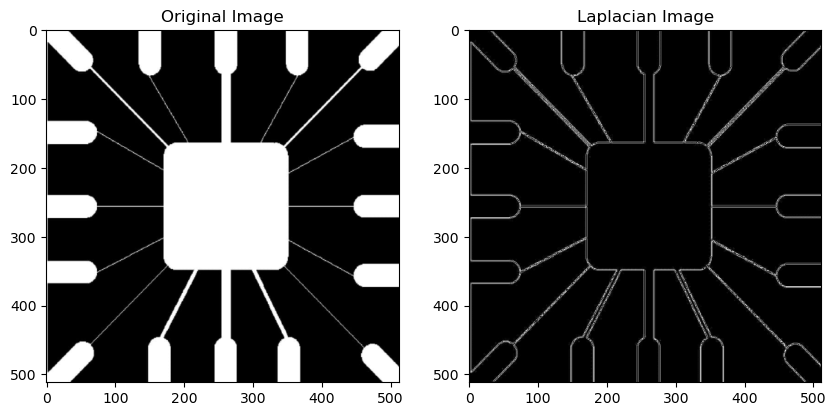

In [12]:
image = cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))  # Resize to 512x512

# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)  # Compute Laplacian
laplacian = np.uint8(np.absolute(laplacian))  # Convert to 8-bit image

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian Image")
plt.show()


Laplacian double effect

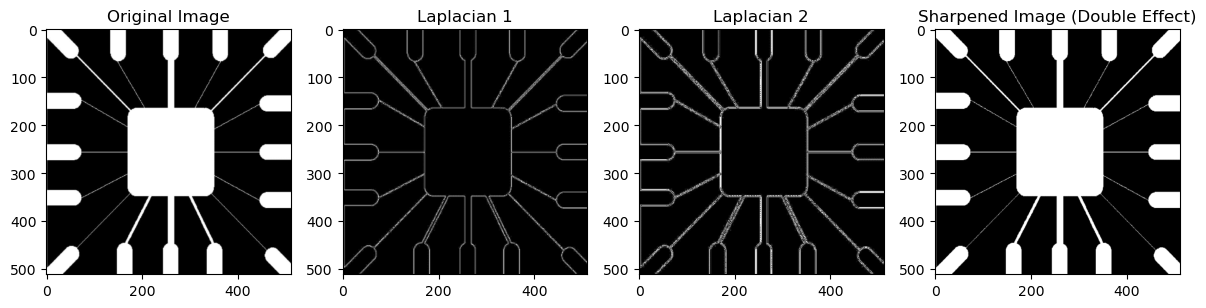

In [14]:
image = cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))  # Resize to 512x512

# First Laplacian Filter
laplacian1 = cv2.Laplacian(image, cv2.CV_64F)
laplacian1 = np.uint8(np.absolute(laplacian1))

# Second Laplacian on Laplacian Output
laplacian2 = cv2.Laplacian(laplacian1, cv2.CV_64F)
laplacian2 = np.uint8(np.absolute(laplacian2))

# Sharpened Image (Original + Weighted Laplacian)
alpha = 0.5
sharpened = cv2.addWeighted(image, 1.5, laplacian1, -alpha, 0)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 4, 2), plt.imshow(laplacian1, cmap='gray'), plt.title("Laplacian 1")
plt.subplot(1, 4, 3), plt.imshow(laplacian2, cmap='gray'), plt.title("Laplacian 2")
plt.subplot(1, 4, 4), plt.imshow(sharpened, cmap='gray'), plt.title("Sharpened Image (Double Effect)")
plt.tight_layout()
plt.show()


Laplacian  image; the  magnified  section shows the positive/negative double-line effect characteristic of the Laplacian. 

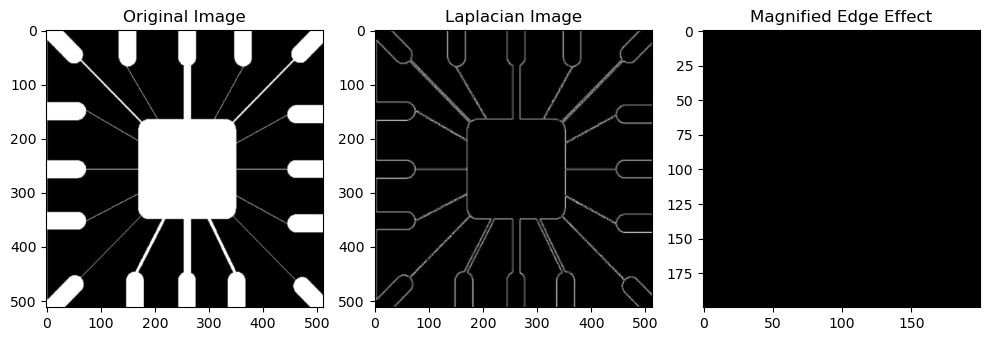

In [15]:
image = cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))  

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian)) 

x, y, w, h = 200, 200, 100, 100  # Define ROI (Region of Interest)
zoomed_section = laplacian[y:y+h, x:x+w]  # Crop the Laplacian result

# Resize the zoomed section for better visualization
zoomed_section_large = cv2.resize(zoomed_section, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display Results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
plt.title("Original Image")

# Laplacian Filtered Image
plt.subplot(1, 3, 2), plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Image")

# Magnified Section Showing Double-Line Effect
plt.subplot(1, 3, 3), plt.imshow(zoomed_section_large, cmap='gray')
plt.title("Magnified Edge Effect")

plt.tight_layout()
plt.show()


Absolute value  of the Laplacian.

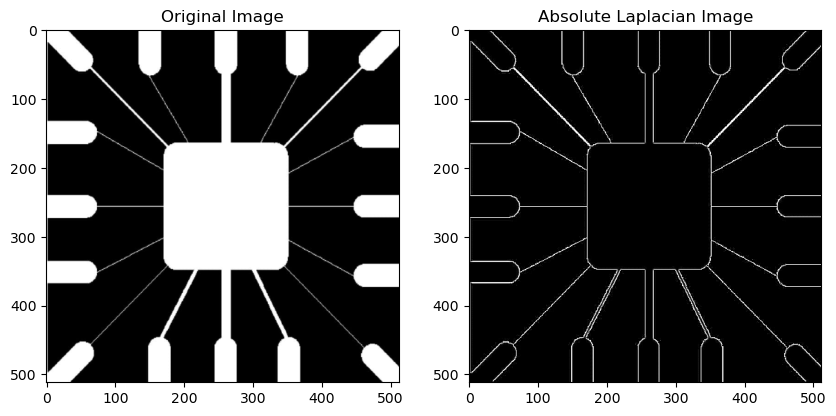

In [19]:
image = cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512)) 

kernel=np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]
                 ])
laplacian=cv2.filter2D(image,-1,kernel)

abs_laplacian = np.absolute(laplacian)  
laplacian_8bit = np.uint8(abs_laplacian)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(laplacian_8bit, cmap='gray'), plt.title("Absolute Laplacian Image")
plt.show()


Positive values of the Laplacian.

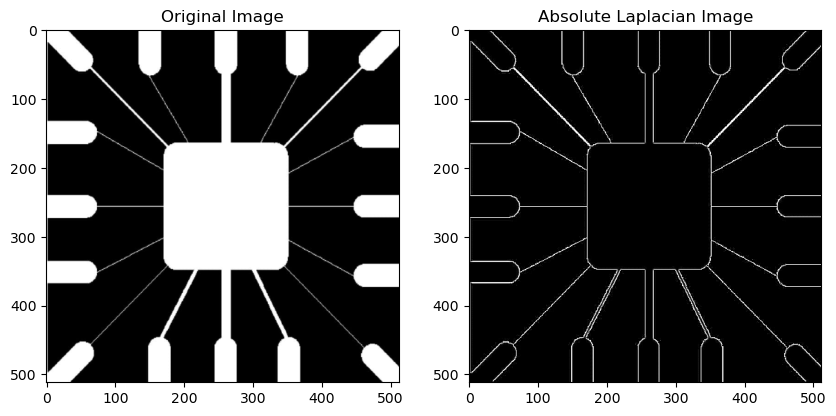

In [20]:
image = cv2.imread("Images/m1.jpeg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512)) 

kernel=np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]
                 ])
laplacian=cv2.filter2D(image,-1,kernel)

positive_laplacian = np.maximum(laplacian,0)  
laplacian_8bit = np.uint8(positive_laplacian)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(laplacian_8bit, cmap='gray'), plt.title("Absolute Laplacian Image")
plt.show()

Edge detection using different kernel

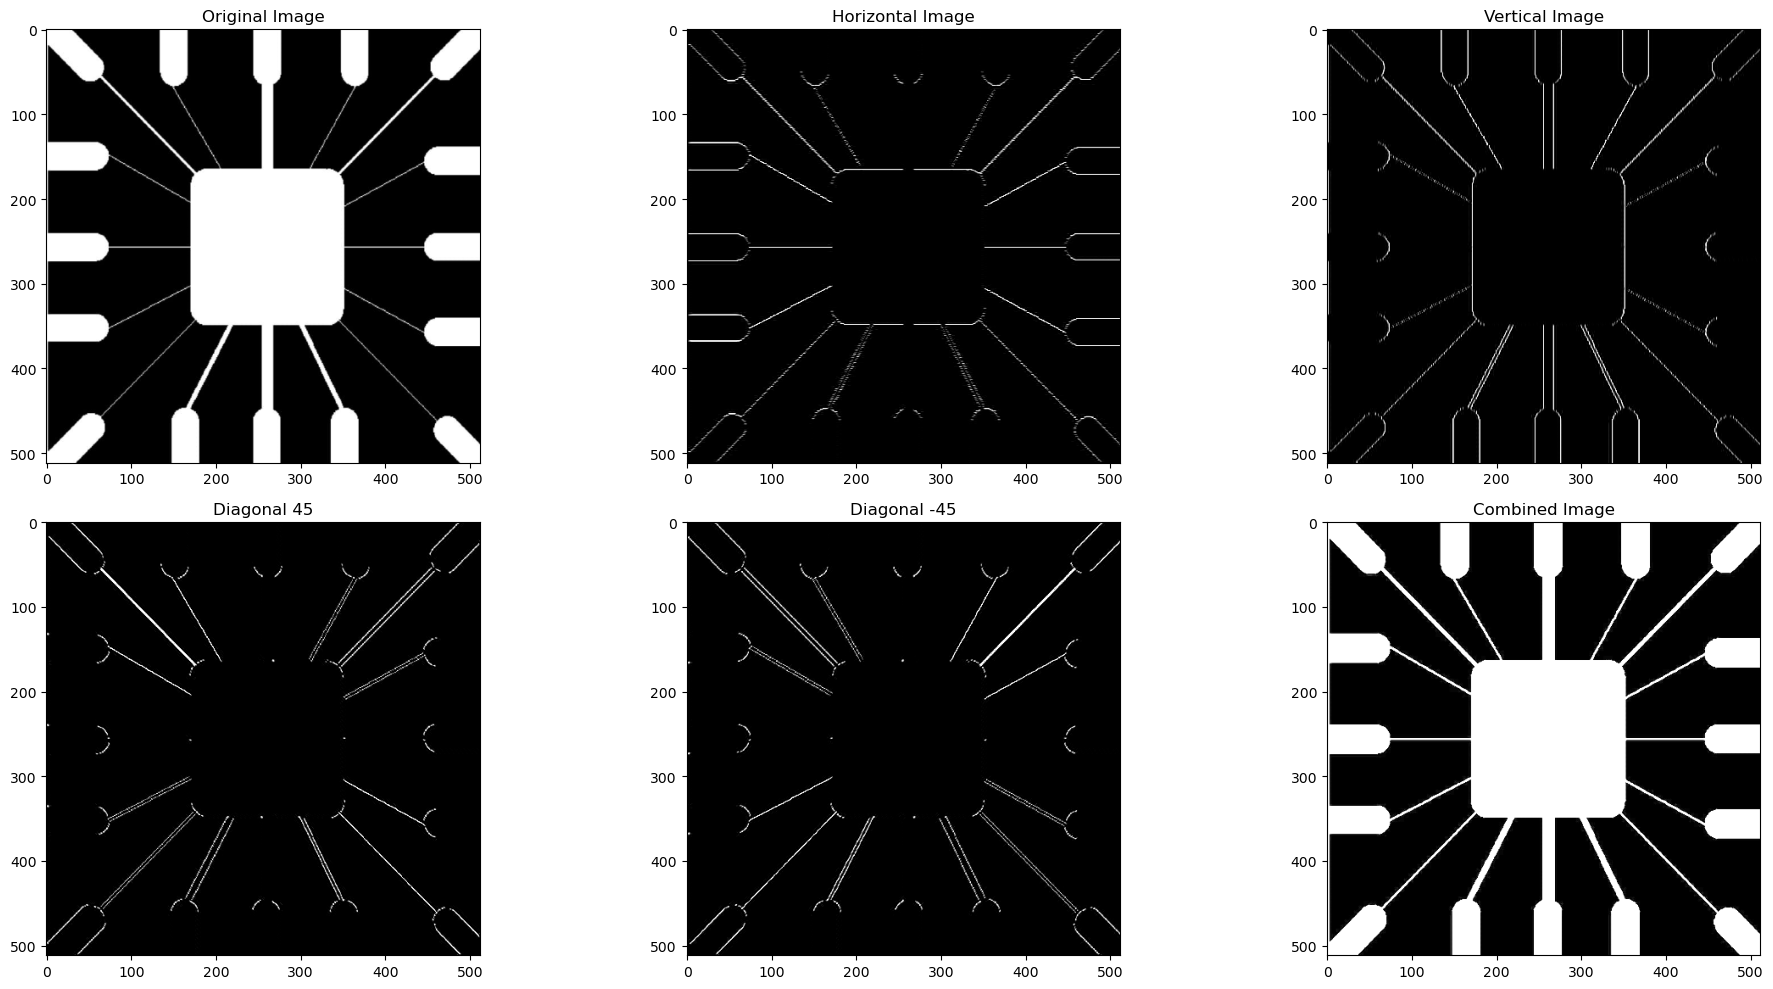

In [25]:
image=cv2.imread("Images/m1.jpeg",cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(512,512))

hor_ker=np.array([[-1,-1,-1],
                  [2,2,2],
                  [-1,-1,-1]])
ver_ker=np.array([[-1,2,-1],
                  [-1,2,-1],
                  [-1,2,-1]])
dia_n_45=np.array([[-1,-1,2],
                 [-1,2,-1],
                 [2,-1,-1]])
dia_45=np.array([[2,-1,-1],
                  [-1,2,-1],
                  [-1,-1,2]])
hor_ver=np.array([[-1,2,-1],
                  [2,2,2],
                  [-1,2,-1]])

hor_image=cv2.filter2D(image,-1,hor_ker)
ver_image=cv2.filter2D(image,-1,ver_ker)
dia_45_image=cv2.filter2D(image,-1,dia_45)
dia_n45_image=cv2.filter2D(image,-1,dia_n_45)
comb_image=cv2.filter2D(image,-1,hor_ver)

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(hor_image, cmap='gray'), plt.title("Horizontal Image")
plt.subplot(2, 3, 3), plt.imshow(ver_image, cmap='gray'), plt.title("Vertical Image")
plt.subplot(2, 3, 4), plt.imshow(dia_45_image, cmap='gray'), plt.title("Diagonal 45")
plt.subplot(2, 3, 5), plt.imshow(dia_n45_image, cmap='gray'), plt.title("Diagonal -45")
plt.subplot(2, 3, 6), plt.imshow(comb_image, cmap='gray'), plt.title("Combined Image")
plt.tight_layout()
plt.show()